In [79]:
import pandas as pd

### OLS model to find relationship between number of killed and State, number of injuries and incident type

In [80]:
%pylab inline
import datetime as dt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 40)

Populating the interactive namespace from numpy and matplotlib


In [81]:
df = pd.read_csv('Level1_data.csv')
df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Incident Type
0,271363,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4,View Incident View Source,mass-shootings
1,269679,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3,View Incident View Source,mass-shootings
2,270036,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4,View Incident View Source,mass-shootings
3,269167,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3,View Incident View Source,mass-shootings
4,268598,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3,View Incident View Source,mass-shootings
...,...,...,...,...,...,...,...,...,...
4856,598136,"July 8, 2016",Missouri,Ballwin,300 block of New Ballwin Rd,0,1,View Incident View Source,officer-involved-shootings
4857,598192,"July 8, 2016",Georgia,Valdosta,3833 North Oak Street Extension,0,2,View Incident View Source,officer-involved-shootings
4858,597756,"July 7, 2016",Texas,Dallas,800 Main St,5,9,View Incident View Source,officer-involved-shootings
4859,598115,"July 7, 2016",Alabama,Selma,700 block of King St,1,2,View Incident View Source,officer-involved-shootings


In [82]:
cols = ['State','# Injured','Incident Type']
cat_cols = ['State','# Injured','Incident Type']

In [83]:
X = pd.get_dummies(df[cols], columns=cat_cols, prefix='', prefix_sep='', drop_first=True)
X = sm.add_constant(X)
y = df['# Killed']

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp i

In [84]:
pd.options.mode.chained_assignment = None

In [85]:
pd.concat([X, y], axis=1).head()

,const,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,...,3,4,5,6,7,8,9,17,19,20,23,24,accidental-injuries,children-injured,children-killed,mass-shootings,officer-involved-shootings,teens-injured,teens-killed,# Killed
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [86]:
model = sm.OLS(endog=y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               # Killed   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     261.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:04:21   Log-Likelihood:                -4969.2
No. Observations:                4861   AIC:                         1.008e+04
Df Residuals:                    4789   BIC:                         1.055e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.9985      0.059     16.916      0.000       0.883       1.114
Alaska                        -0.3421      0.211     -1.621      0.105      -0.756       0.072
Arizona                        0.2298      0.113      2.039      0.041       0.009       0.451
Arkansas                      -0.0645      0.105     -0.613      0.540      -0.271       0.142
California                     0.1797      0.061      2.955      0.003       0.060       0.299
Colorado                       0.2284      0.092      2.474      0.013       0.047       0.409
Connecticut                    0.4053      0.141      2.869      0.004       0.128       0.682
Delaware                       0.2847      0.246      1.156      0.248      -0.198       0.767
District of Columbia           0.3433      0.130      2.640      0.008       0.088       0.598
Florida                        0.1407      0.063      2.220      0.026       0.016       0.265
Georgia                        0.0444      0.069      0.643      0.521      -0.091       0.180
Hawaii                        -0.2202      0.680     -0.324      0.746      -1.554       1.114
Idaho                         -0.1454      0.308     -0.472      0.637      -0.749       0.458
Illinois                       0.1635      0.062      2.627      0.009       0.041       0.285
Indiana                        0.0213      0.083      0.257      0.797      -0.141       0.183
Iowa                           0.3514      0.177      1.981      0.048       0.004       0.699
Kansas                         0.0462      0.134      0.344      0.731      -0.217       0.309
Kentucky                      -0.0876      0.091     -0.967      0.334      -0.265       0.090
Louisiana                     -0.1624      0.067     -2.414      0.016      -0.294      -0.031
Maine                         -0.2381      0.308     -0.773      0.439      -0.842       0.365
Maryland                      -0.0080      0.087     -0.091      0.927      -0.179       0.163
Massachusetts                  0.0916      0.136      0.675      0.499      -0.174       0.358
Michigan                       0.0334      0.076      0.441      0.659      -0.115       0.182
Minnesota                     -0.1459      0.119     -1.231      0.218      -0.378       0.087
Mississippi                   -0.0433      0.083     -0.522      0.602      -0.206       0.120
Missouri                       0.0454      0.070      0.651      0.515      -0.091       0.182
Montana                       -0.0004      0.183     -0.002      0.998      -0.359       0.358
Nebraska                       0.3046      0.137      2.229      0.026       0.037       0.573
Nevada                        -0.1767      0.120     -1.472      0.141      -0.412       0.059
New Hampshire                 -0.0308      

The R-square value for above model is 0.795 which depicts that model is a good fit. Implying there is a strong relationship between the independant and dependant variable. Dependant variable '# Killed' is dependant upon State, # Injured, and Incident Type.

In [87]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)

In [89]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print('The out-of-sample R2 is', lr.score(X_test, y_test))

The out-of-sample R2 is -4.941840615137343e+21


In [90]:
pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_}, columns=['Feature','Coefficient'])

,Feature,Coefficient
0,const,3.975754e+06
1,Alaska,-4.064549e-01
2,Arizona,5.106937e-02
3,Arkansas,-7.743473e-02
4,California,1.553832e-01
...,...,...
67,children-killed,7.391204e-01
68,mass-shootings,2.366862e+00
69,officer-involved-shootings,7.309423e-01
70,teens-injured,-9.458769e-02


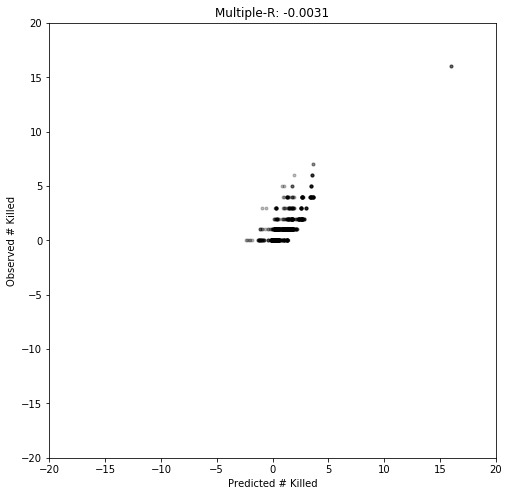

In [91]:
y_pred = lr.predict(X_test)
plt.figure(figsize=(8,8))
plt.plot(y_pred, y_test, 'k.', alpha=0.25) # don't forget to transform our predictions!
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.xlabel('Predicted # Killed')
plt.ylabel('Observed # Killed')
plt.title('Multiple-R: %.4f' % np.corrcoef(y_pred, y_test)[0,1]);